### Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Explianing the dataset

In [2]:
df=pd.read_csv("Sales_data_zone_wise.csv")
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [6]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [8]:
df.dtypes

Month       object
Zone - A     int64
Zone - B     int64
Zone - C     int64
Zone - D     int64
dtype: object

### 1) The mean sales generated by each zone.

In [9]:
df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

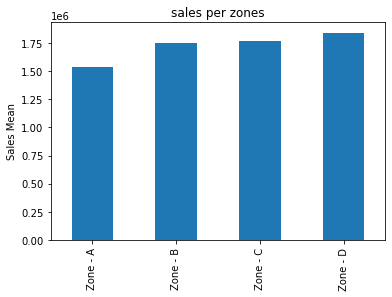

In [26]:
df1=df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean()
df1.plot(kind='bar')
plt.title('sales per zones')
plt.ylabel('Sales Mean')
plt.show()

### 2) Total sales generated by all the zones for each month.

In [12]:
df['Total_Sales']=df['Zone - A']+df['Zone - B']+df['Zone - C']+ df['Zone - D']
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


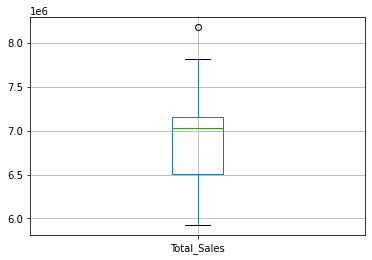

In [22]:
df[['Total_Sales']].boxplot()
plt.show()

we can see there are outliers

### 3) Check whether all the zones generate the same amount of sales.

In [13]:
#H0:all zones generate the same amount of sales
#H1:all zones generate the different amount of sales

In [15]:
import scipy.stats as stats
from scipy.stats import f_oneway
alpha=0.05
f,p=stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
if p<alpha:
  print("Reject the H0")
else:
   print("Failing to reject H0")

Reject the H0


all zones generate different amount of sales